# Import Required Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
fbs,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000


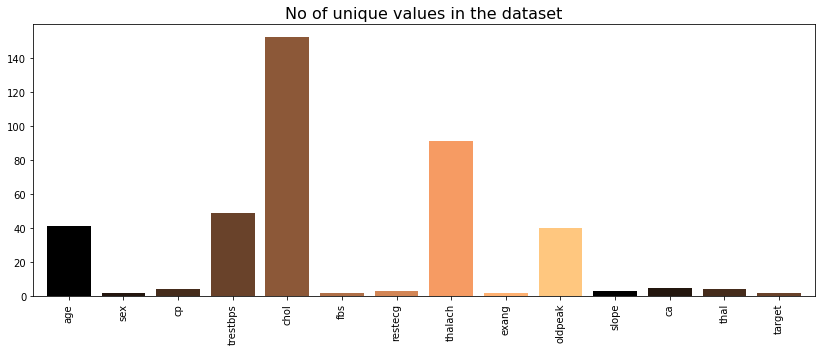

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [9]:
color = plt.cm.copper(np.linspace(0, 1, 10))
plt.figure(figsize=(14,5))
data.nunique().plot(kind='bar', width=.8, color=color)
plt.title('No of unique values in the dataset', size=16)
plt.show()
print(data.nunique())

In [10]:
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')


discrette feature: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous feature: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


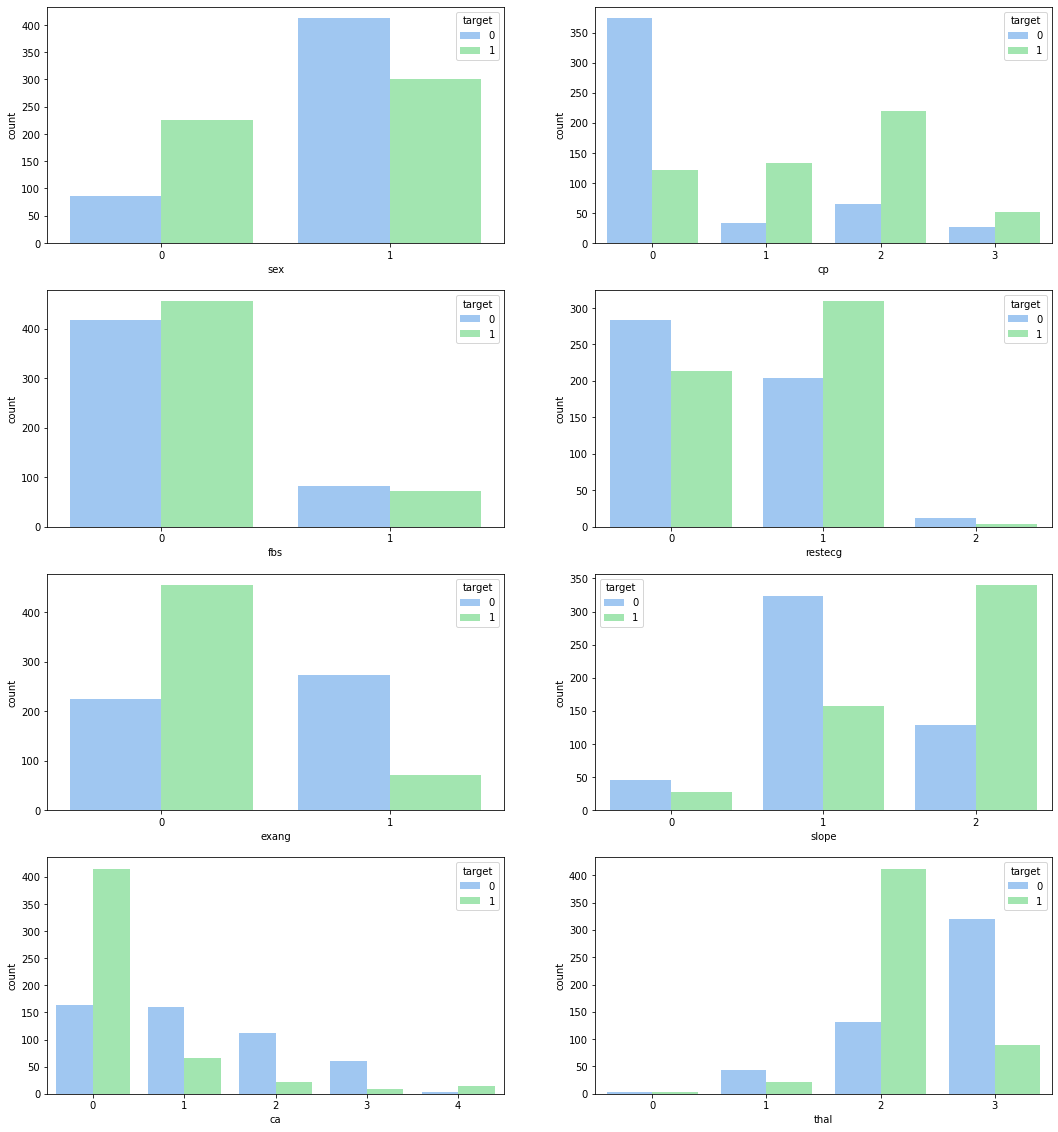

In [11]:
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(18,20)) 
for feature in discrette_feature[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x=data[feature], hue=data.target)
    i += 1
    
plt.show()

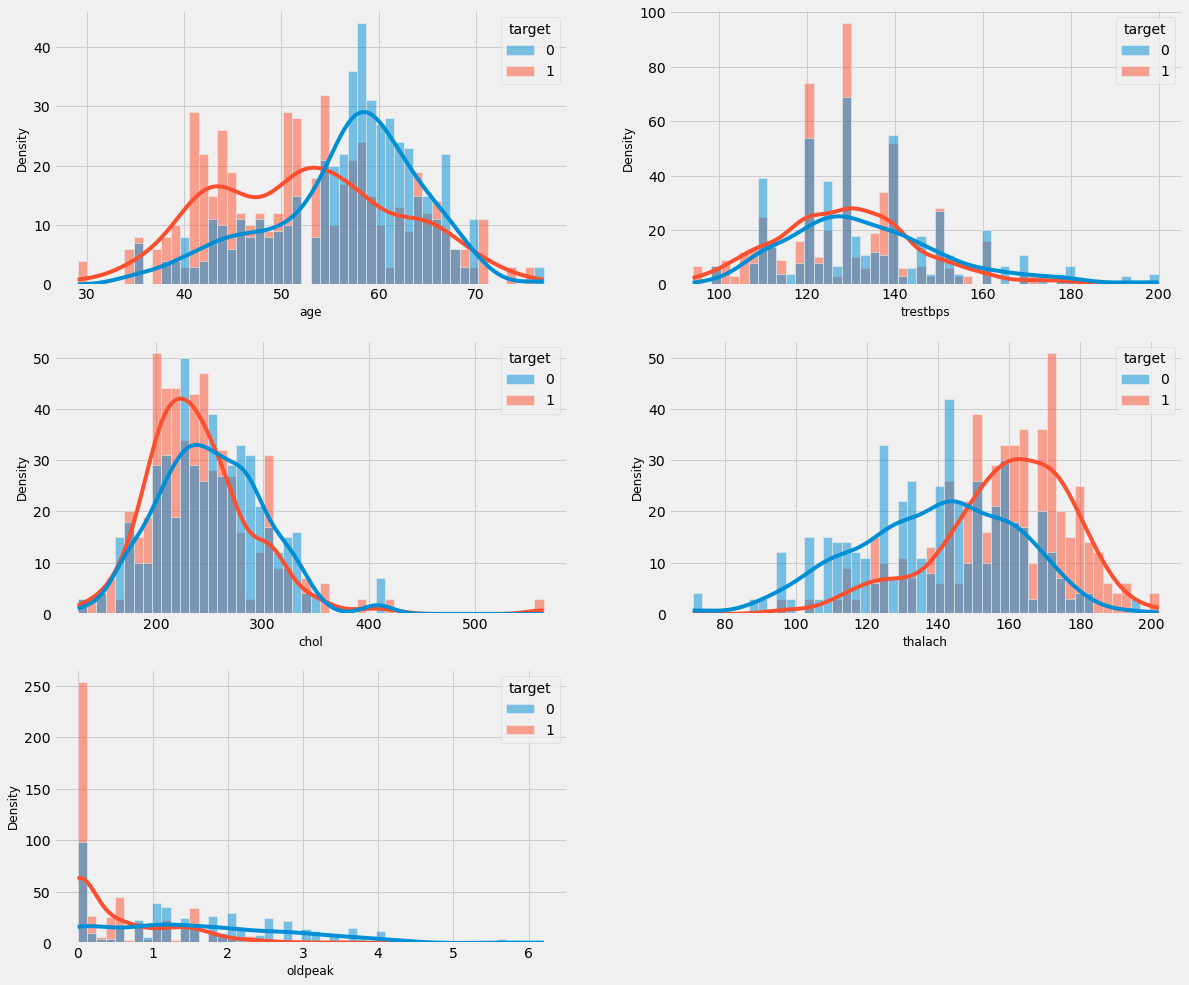

In [12]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.histplot(x=data[feature],kde=True,bins=50, hue=data.target)
    plt.xlabel(feature,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

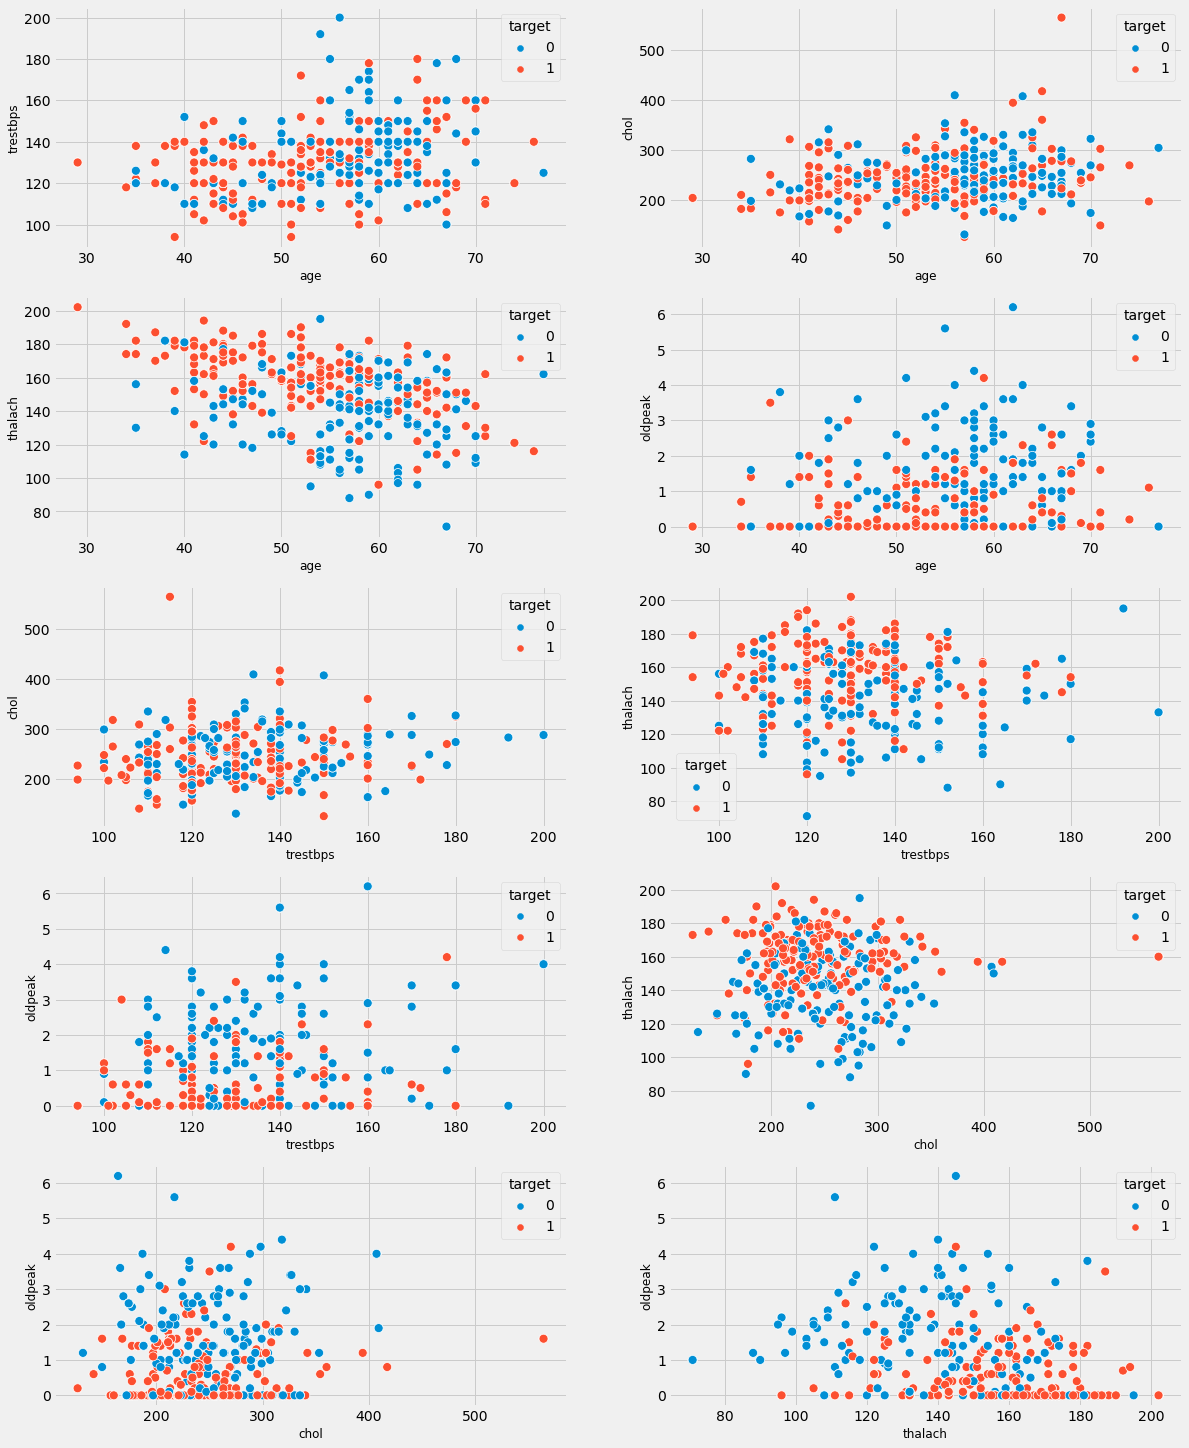

In [13]:
i = 1
n = 1
plt.figure(figsize=(18,24)) 
for feature in continuous_feature:
    for i_ in continuous_feature[n:]:
        plt.subplot(5, 2, i)
        sns.scatterplot(x=data[feature],y=data[i_], s=80, hue=data.target)
        plt.xlabel(feature,size=12)
        plt.ylabel(i_,size=12)
        i += 1
    n+=1
plt.show()   

# Using Heatmap & display Correlation

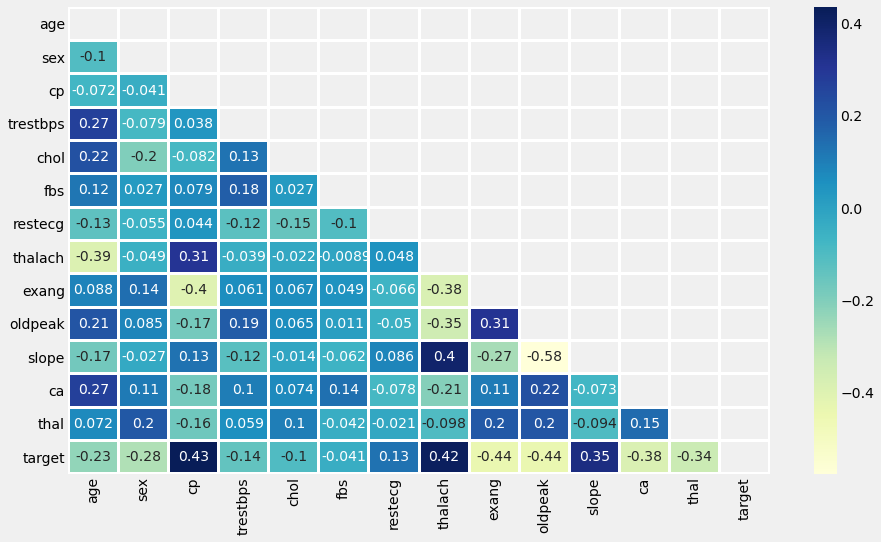

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=np.triu(data.corr()), annot=True, cmap='YlGnBu',linewidth=2)
plt.show()

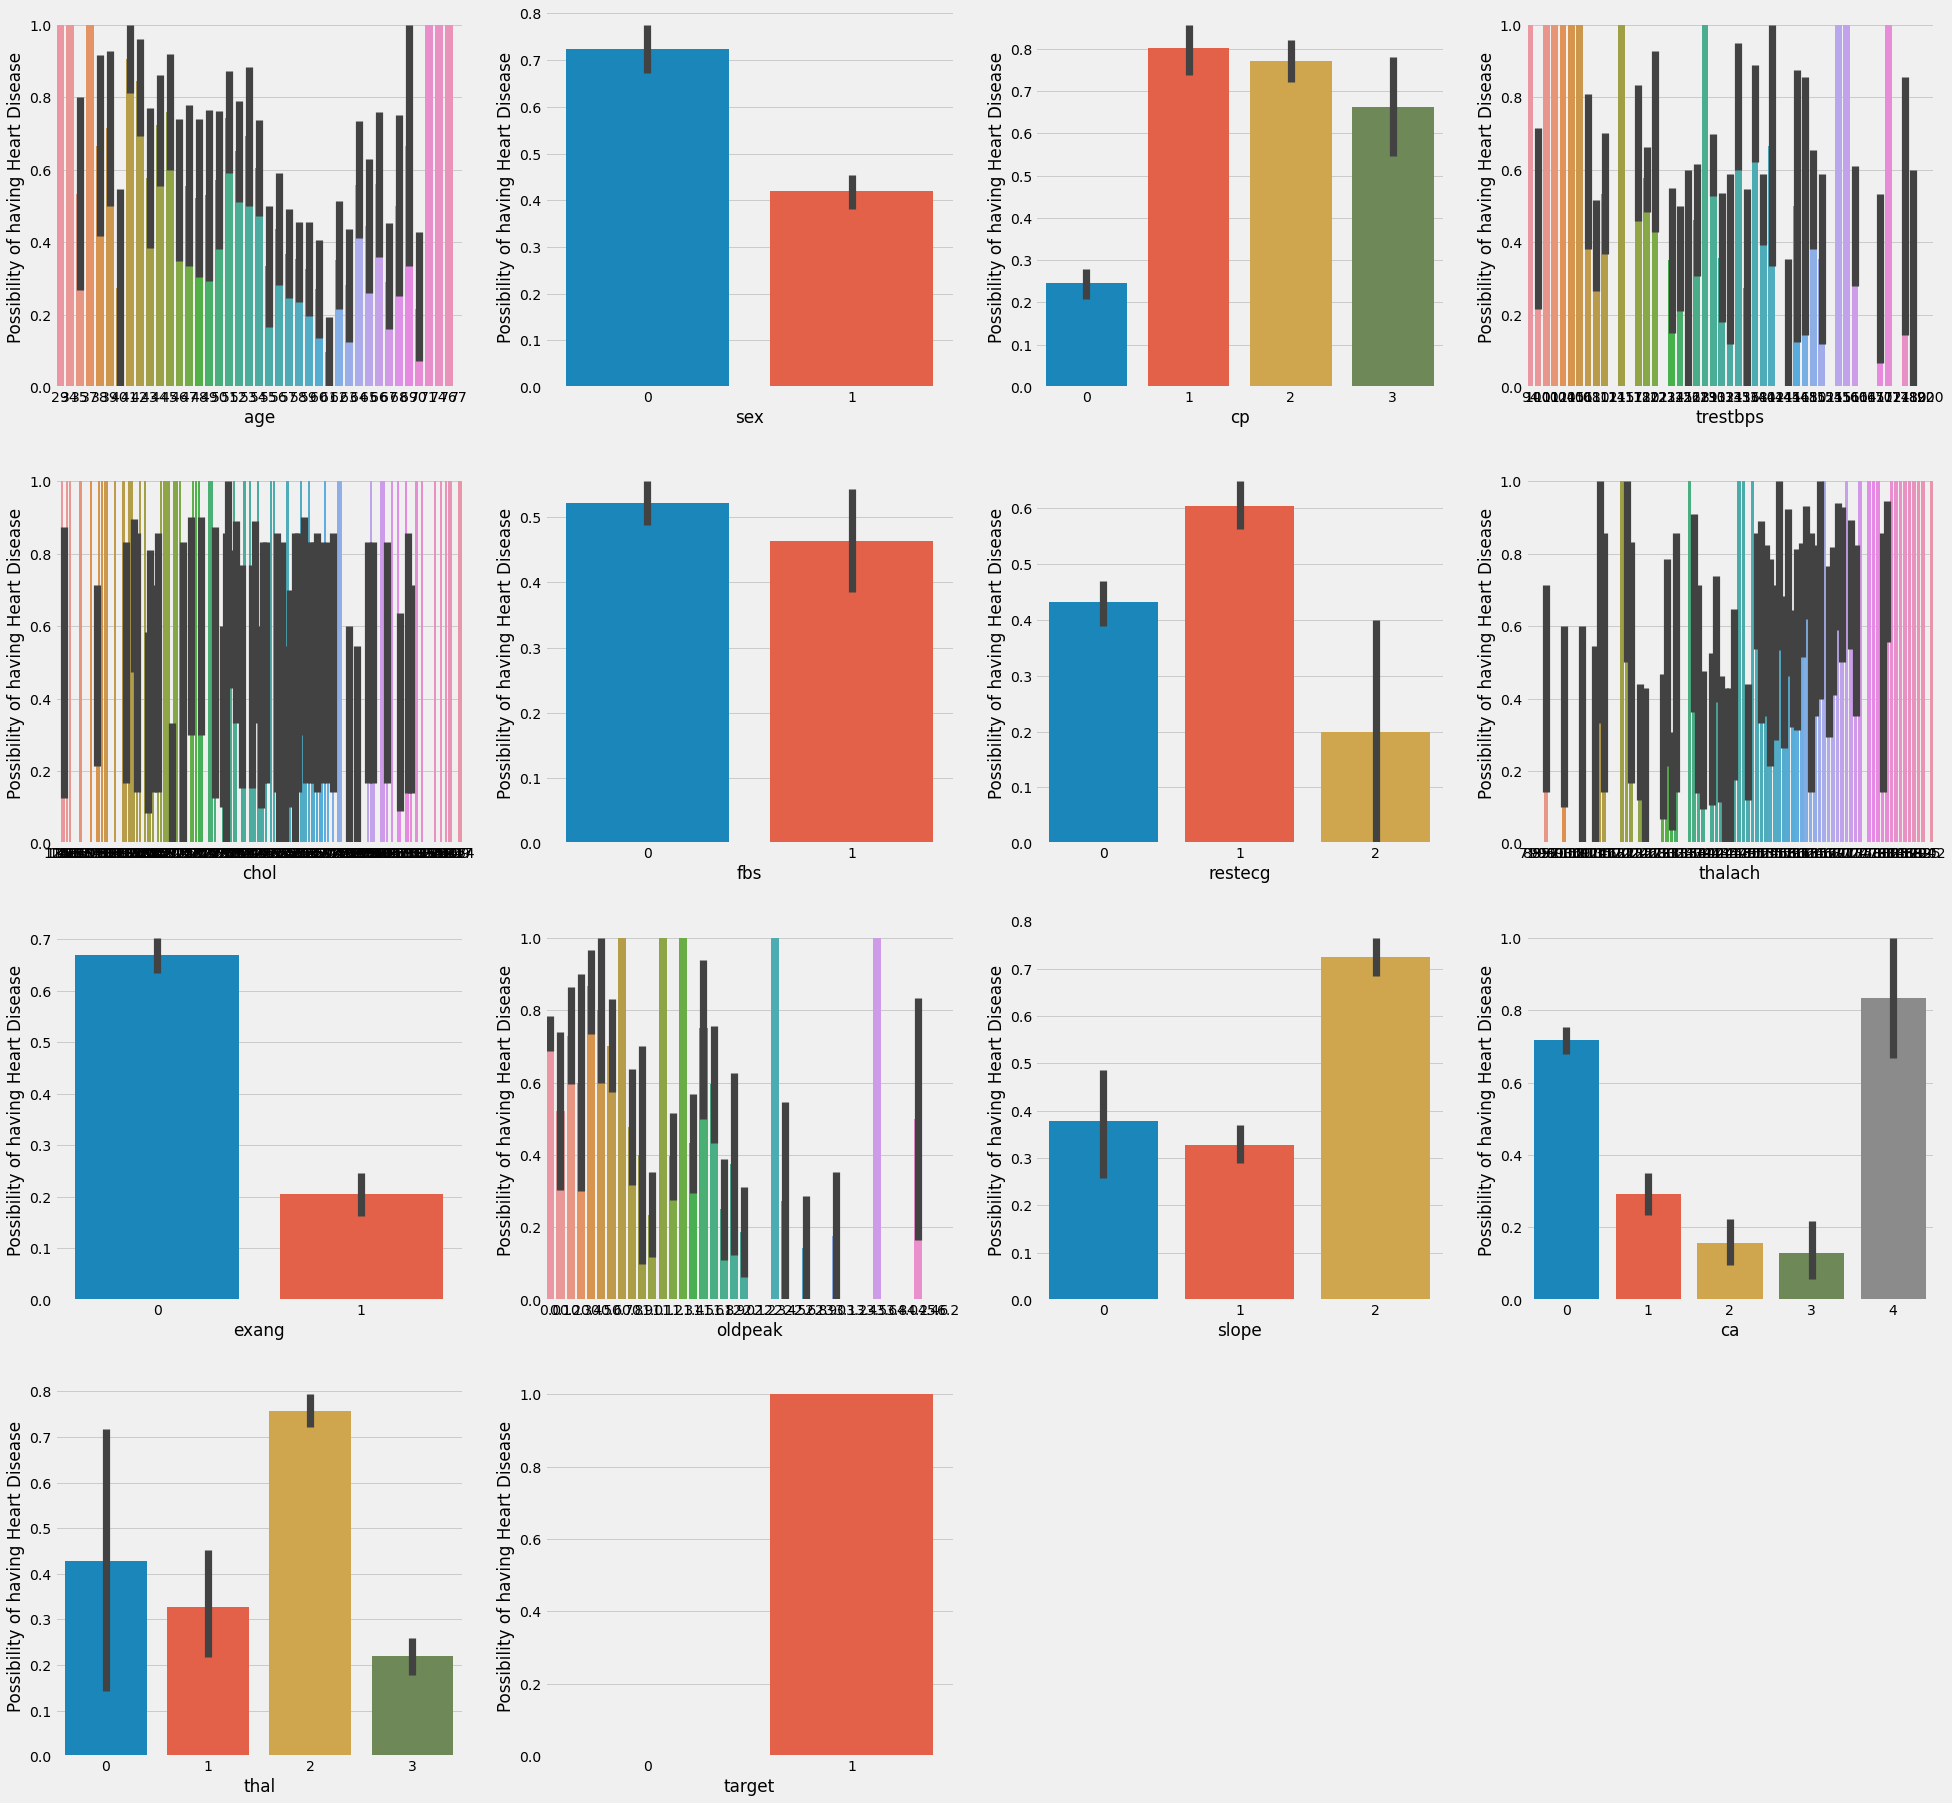

In [15]:
categorical_values = list(data.columns)
plt.figure(figsize=(30,30))

for i, col in enumerate(categorical_values, 1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y='target', data=data)
    plt.ylabel("Possibility of having Heart Disease")
    plt.xlabel(f"{col}")

# Model Training

In [16]:
X = data.drop(columns=['target'])
y = data['target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape: (820, 13)
y_train shape: (820,)
x_test shape : (205, 13)
y_test shape : (205,)


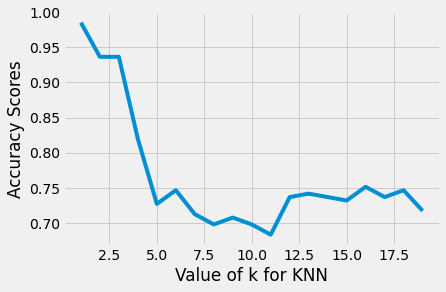

In [18]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Scores')
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy of our KNN model is: {acc}")

[0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
Accuracy of our KNN model is: 71.21951219512195


In [20]:
from sklearn.metrics import confusion_matrix as cm

[[75 28]
 [31 71]]


<AxesSubplot:>

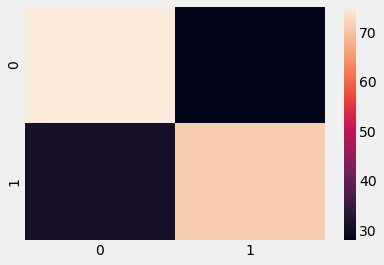

In [21]:
conf = cm(y_test, y_pred)
print(conf)
sns.heatmap(conf)